### Logistic Regression Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Load dataset and shape of the dataset

In [2]:
data_frame = pd.read_csv("FinalData.csv")

data_frame.shape


(309226, 10)

#### Dataset values, head(10)

In [3]:
data_frame.head(10)

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,HEPA,1.50,M,False,False,False,False,False,False,False
1,RV5,28.00,F,False,True,True,True,False,True,True
2,FLU3,53.00,F,False,False,False,False,False,False,False
3,HEP,69.00,M,False,False,False,False,False,False,False
4,HEPA,24.00,F,False,False,True,True,False,True,True
5,TDAP,35.00,F,False,False,False,False,False,False,False
6,VARZOS,65.00,F,False,False,False,False,False,False,False
7,PPV,1.58,F,False,False,True,True,False,False,True
8,FLU4,0.33,F,False,False,False,False,False,False,False
9,FLU4,62.00,M,False,False,False,False,False,False,False


#### Data Cleaning. If there any missing values, then delete the corresponding rows for more accuracy

In [4]:
print("Missing values?")
print(data_frame.isnull().values.any())
print("ereasing null values.")
data_frame = data_frame.dropna()

print("Missing values?")
print(data_frame.isnull().values.any())
data_frame.shape

Missing values?
True
ereasing null values.
Missing values?
False


(245860, 10)

#### Data transform: mapping string values with integer values

In [5]:
asthma_map = {True : 1, False : 0}
data_frame['ASTHMA'] = data_frame['ASTHMA'].map(asthma_map)

sleep_map = {True : 1, False : 0}
data_frame['SLEEPING_PROB'] = data_frame['SLEEPING_PROB'].map(sleep_map)

chest_map = {True : 1, False : 0}
data_frame['CHEST_TIGHTNESS'] = data_frame['CHEST_TIGHTNESS'].map(chest_map)

breath_map = {True : 1, False : 0}
data_frame['BREATH'] = data_frame['BREATH'].map(breath_map)

cough_map = {True : 1, False : 0}
data_frame['COUGH'] = data_frame['COUGH'].map(cough_map)

allergy_map = {True : 1, False : 0}
data_frame['ALLERGY'] = data_frame['ALLERGY'].map(allergy_map)

sex_map = {'M' : 1, 'F' : 0, 'U' : 2}
data_frame['SEX'] = data_frame['SEX'].map(sex_map)

wheezing_map = {True : 1, False : 0}
data_frame['WHEEZING'] = data_frame['WHEEZING'].map(wheezing_map)

vax_data = data_frame['VAX_TYPE']
vax=[]
for items in vax_data:
    if items in vax:
        continue
    else:
        #print(items)
        vax.append(items)
#print("Vax list: ")
#print(vax)
key=0
vax_map={key: value for (key, value) in zip(vax,range(len(vax))) }
data_frame['VAX_TYPE'] = data_frame['VAX_TYPE'].map(vax_map)

#### Dataset after mapping

In [6]:
data_frame.head(10)

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,0,1.50,1,0,0,0,0,0,0,0
1,1,28.00,0,0,1,1,1,0,1,1
2,2,53.00,0,0,0,0,0,0,0,0
3,3,69.00,1,0,0,0,0,0,0,0
4,0,24.00,0,0,0,1,1,0,1,1
5,4,35.00,0,0,0,0,0,0,0,0
6,5,65.00,0,0,0,0,0,0,0,0
7,6,1.58,0,0,0,1,1,0,0,1
8,7,0.33,0,0,0,0,0,0,0,0
9,7,62.00,1,0,0,0,0,0,0,0


#### Number of case having asthma or not after vaccination

In [7]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['ASTHMA'] == 1])
num_false = len(data_frame.loc[data_frame['ASTHMA'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  16089 (6.54%)
Number of False cases: 229771 (93.46%)


#### Data splitting: 70% train set and 30% test set

In [8]:
from sklearn.model_selection import train_test_split

feature_col_names = ['VAX_TYPE', 'AGE_YRS', 'SEX', 'SLEEPING_PROB', 'CHEST_TIGHTNESS', 'BREATH', 'COUGH', 'ALLERGY','WHEEZING']
predicted_class_names = ['ASTHMA']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

print("split varirfication:")
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

split varirfication:
70.00% in training set
30.00% in test set


#### verifying whether the predicted value was split correctly

In [9]:
print("\nOriginal True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['ASTHMA'] == 1]), (len(data_frame.loc[data_frame['ASTHMA'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['ASTHMA'] == 0]), (len(data_frame.loc[data_frame['ASTHMA'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))



Original True  : 16089 (6.54%)
Original False : 229771 (93.46%)

Training True  : 11289 (6.56%)
Training False : 160813 (93.44%)

Test True      : 4800 (6.51%)
Test False     : 68958 (93.49%)


#### Data Scaling

In [10]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

#### Training algorithm: Logistic Regression 

In [12]:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=50)
lr_model.fit(X_train, y_train.ravel())

lr_predict_train = lr_model.predict(X_train)

#### Accuracy on train set and test set

In [13]:

#get accuracy
from sklearn import metrics
lr_accuracy = metrics.accuracy_score(y_train, lr_predict_train)

#print accuracy
from sklearn import metrics
print("\nLR performance on Training Data:")
print("Accuracy: {0:.4f}\n".format(lr_accuracy))


lr_predict_test = lr_model.predict(X_test)

#get accuracy
lr_accuracy_testdata = metrics.accuracy_score(y_test, lr_predict_test)

#print accuracy
print("LR performance on Test Data:")
print("Accuracy: {0:.4f}\n".format(lr_accuracy_testdata))


LR performance on Training Data:
Accuracy: 0.9675

LR performance on Test Data:
Accuracy: 0.9673



#### Confusion matrix and classification report

In [14]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion Matrix for LR")
print("{0}".format(confusion_matrix(y_test,lr_predict_test,labels=[1,0])))  

print("\nClassification Report")
print("{0}".format(classification_report(y_test,lr_predict_test, labels=[1, 0]))) 

Confusion Matrix for LR
[[ 4508   292]
 [ 2117 66841]]

Classification Report
             precision    recall  f1-score   support

          1       0.68      0.94      0.79      4800
          0       1.00      0.97      0.98     68958

avg / total       0.98      0.97      0.97     73758



#### ROC curve(point moving  to the upper left is better)

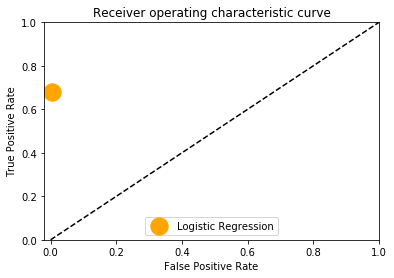

In [2]:

# fpr, tpr
import numpy as np
import matplotlib.pyplot as plt

logistic = np.array([0.003, 0.68])



# plotting

plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=300)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc='lower center')

plt.show()